In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [4]:
kaggle_credentails = json.load(open(r"C:\Users\rifat\Downloads\kaggle.json"))

In [5]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# Unzip the downloaded dataset
with ZipFile("face-mask-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [8]:
print(os.listdir(r"C:\Users\rifat\data"))

['without_mask', 'with_mask']


In [9]:
with_mask_files = os.listdir('data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [10]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two classes of Images

with mask --> 1

without mask --> 0

In [12]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828


In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


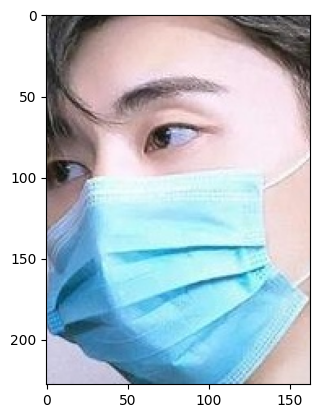

In [17]:
# displaying with mask image
img = mpimg.imread('data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

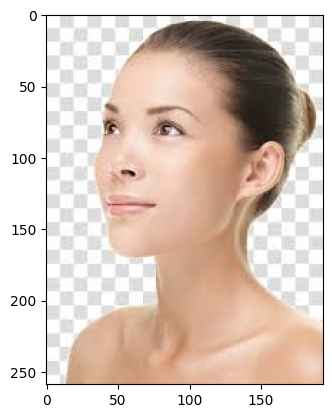

In [18]:
# displaying without mask image
img = mpimg.imread('data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the Images


2. Convert the images to numpy arrays

In [19]:
# convert images to numpy arrays

with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

C:\Users\rifat\env3\lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data)

list

In [21]:
len(data)

7553

In [22]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], shape=(128, 128, 3), dtype=uint8)

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [29]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [33]:
X_train[0]

array([[[226, 234, 201],
        [211, 216, 188],
        [188, 188, 169],
        ...,
        [186, 181, 165],
        [179, 175, 150],
        [166, 181, 136]],

       [[224, 228, 218],
        [201, 204, 195],
        [201, 199, 192],
        ...,
        [197, 190, 182],
        [175, 170, 153],
        [162, 180, 143]],

       [[205, 204, 212],
        [221, 220, 226],
        [195, 192, 196],
        ...,
        [183, 174, 173],
        [172, 167, 159],
        [181, 199, 171]],

       ...,

       [[156, 176, 197],
        [159, 180, 196],
        [164, 185, 196],
        ...,
        [ 89,  99,  71],
        [106, 113,  83],
        [ 99, 103,  68]],

       [[151, 177, 196],
        [167, 190, 208],
        [174, 192, 210],
        ...,
        [106, 113,  80],
        [ 99, 104,  64],
        [ 98,  98,  41]],

       [[162, 192, 210],
        [177, 199, 220],
        [175, 189, 213],
        ...,
        [103, 107,  70],
        [ 79,  80,  46],
        [ 99,  94,  61]]

In [34]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

Building a Convolutional Neural Networks (CNN)

In [35]:
import tensorflow as tf
from tensorflow import keras

In [44]:
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential([
    keras.Input(shape=(128, 128, 3)),

    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(num_of_classes, activation='sigmoid')
])


In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

# Train generator — loads images in batches directly from disk
train_generator = datagen.flow_from_directory(
    'data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    'data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model using generators
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5
)


Found 6799 images belonging to 2 classes.
Found 754 images belonging to 2 classes.


C:\Users\rifat\env3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 43s 190ms/step - accuracy: 0.7988 - loss: 0.4753 - val_accuracy: 0.9231 - val_loss: 0.1889
Epoch 2/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 38s 177ms/step - accuracy: 0.8894 - loss: 0.2837 - val_accuracy: 0.9244 - val_loss: 0.1869
Epoch 3/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 37s 174ms/step - accuracy: 0.9106 - loss: 0.2296 - val_accuracy: 0.9363 - val_loss: 0.1680
Epoch 4/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 39s 181ms/step - accuracy: 0.9260 - loss: 0.1885 - val_accuracy: 0.9218 - val_loss: 0.2059
Epoch 5/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 40s 186ms/step - accuracy: 0.9418 - loss: 0.1495 - val_accuracy: 0.9231 - val_loss: 0.2226


Model Evaluation

In [48]:
# Evaluate the model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")


Found 7553 images belonging to 2 classes.
237/237 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.9592 - loss: 0.1042
Test Accuracy: 0.9592


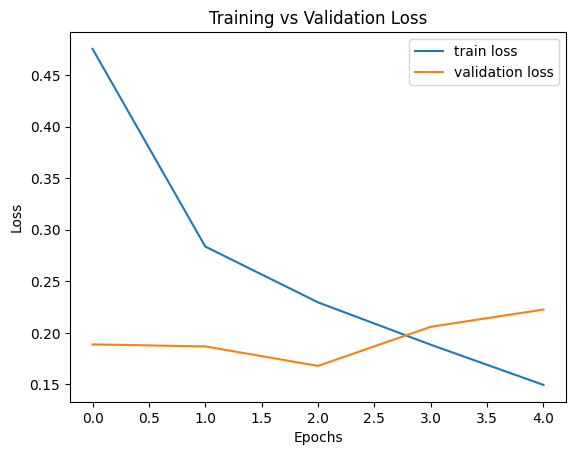

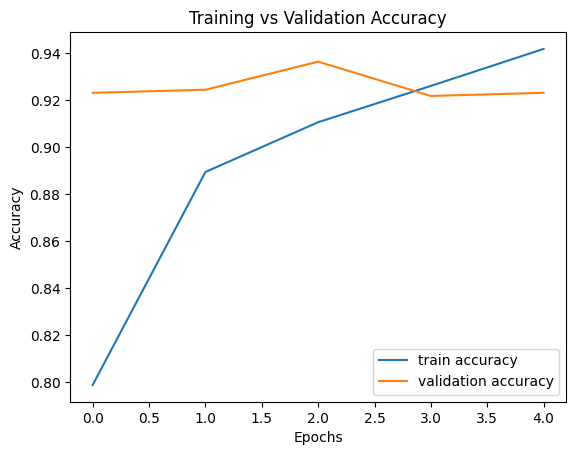

In [49]:
h = history

# Plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


Predictive System

Path of the image to be predicted:  C:/Users/rifat/OneDrive/Pictures/with mask.jpg


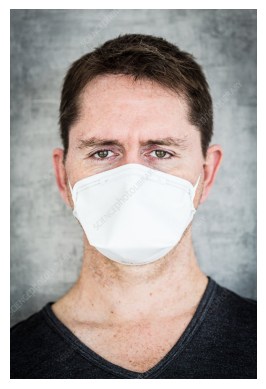

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Raw prediction: [[0.48636845 0.6121981 ]]
The person in the image is wearing a mask 😷


In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ask for image path
input_image_path = input('Path of the image to be predicted: ')

# Read the image
input_image = cv2.imread(input_image_path)

# Convert BGR to RGB
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(input_image_rgb)
plt.axis('off')
plt.show()

# Preprocess the image
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Predict
input_prediction = model.predict(input_image_reshaped)

print("Raw prediction:", input_prediction)

# Determine label
input_pred_label = np.argmax(input_prediction)

# Output result
if input_pred_label == 1:
    print('The person in the image is wearing a mask 😷')
else:
    print('The person in the image is not wearing a mask ❌')


Path of the image to be predicted:  C:\Users\rifat\OneDrive\Pictures\ChatGPT Image Jun 28, 2025, 04_42_14 PM.png


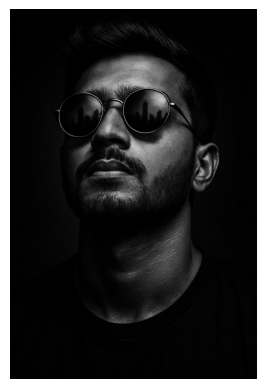

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Raw prediction: [[0.781476   0.16107832]]
The person in the image is not wearing a mask ❌


In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ask for image path
input_image_path = input('Path of the image to be predicted: ')

# Read the image
input_image = cv2.imread(input_image_path)

# Convert BGR to RGB
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(input_image_rgb)
plt.axis('off')
plt.show()

# Preprocess the image
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Predict
input_prediction = model.predict(input_image_reshaped)

print("Raw prediction:", input_prediction)

# Determine label
input_pred_label = np.argmax(input_prediction)

# Output result
if input_pred_label == 1:
    print('The person in the image is wearing a mask 😷')
else:
    print('The person in the image is not wearing a mask ❌')



In [53]:
# Save the model in H5 format
model.save("mask_detector_model.h5")
print("Model saved as mask_detector_model.h5")


Model saved as mask_detector_model.h5
